In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
from tensorflow.keras.datasets import fashion_mnist

In [67]:
(x_train,y_train),(x_test,y_test)= fashion_mnist.load_data()

In [85]:
print(x_test.shape)
print(x_train.shape)
print(y_test_cat.shape)
print(y_train_cat.shape)

(10000, 28, 28, 1)
(60000, 28, 28, 1)
(10000, 10)
(60000, 10)


In [69]:
#normalzation 
x_train= (x_train/255).reshape(60000,28,28,1)
x_test=(x_test/255).reshape(10000,28,28,1)

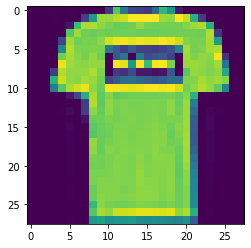

In [70]:
plt.imshow(x_train[1])

In [72]:
x_train.shape

(60000, 28, 28, 1)

In [73]:
#convert y into catagoriacal data
from tensorflow.keras.utils import to_categorical

In [74]:
y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)

In [75]:
y_train_cat.shape

(60000, 10)

In [94]:
#define the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

In [120]:
model=Sequential()

# 1. combination of conv and max pool
model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
#2. combination of conv and max pool
model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model
#flatten layer: No, this isn't specific to transfer learning. It is used over feature maps in the classification layer, that is easier to interpret and less prone to overfitting than a normal fully connected layer.
model.add(Flatten())

# 3 dense layer
model.add(Dense(256,'relu'))

#output layer
model.add(Dense(10,'softmax'))

# compile
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [121]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 9, 9, 32)          16416     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 4, 4, 32)         0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 256)              

In [122]:
# early stopping
from tensorflow.keras.callbacks import EarlyStopping

In [123]:
early_stop=EarlyStopping(patience=2)

In [124]:
model.fit(x=x_train, y=y_train_cat,epochs=15,callbacks=early_stop,validation_data=(x_test,y_test_cat))

Epoch 1/15
1875/1875 [==============================] - 40s 21ms/step - loss: 0.4875 - accuracy: 0.8216 - val_loss: 0.3801 - val_accuracy: 0.8612
Epoch 2/15
1875/1875 [==============================] - 39s 21ms/step - loss: 0.3250 - accuracy: 0.8820 - val_loss: 0.3294 - val_accuracy: 0.8830
Epoch 3/15
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2863 - accuracy: 0.8949 - val_loss: 0.3304 - val_accuracy: 0.8790
Epoch 4/15
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2652 - accuracy: 0.9033 - val_loss: 0.3157 - val_accuracy: 0.8919
Epoch 5/15
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2523 - accuracy: 0.9099 - val_loss: 0.3103 - val_accuracy: 0.8947
Epoch 6/15
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2439 - accuracy: 0.9124 - val_loss: 0.3273 - val_accuracy: 0.8957
Epoch 7/15
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2384 - accuracy: 0.9147 - val_loss: 0.3169 -

In [126]:
loss=pd.DataFrame(model.history.history)

In [117]:
model.evaluate(x_test,y_test_cat, verbose=0)

[0.31771817803382874, 0.8968999981880188]

In [114]:
#loss[['loss','val_loss']].plot() ### with optimizer = 'adam' accurracy 0.9 after 6 steps

<AxesSubplot:>

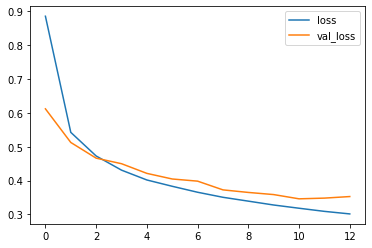

In [102]:
#loss[['loss','val_loss']].plot() ## with = "SGD" = [0.35296934843063354, 0.8725000023841858] after 14 steps

<AxesSubplot:>

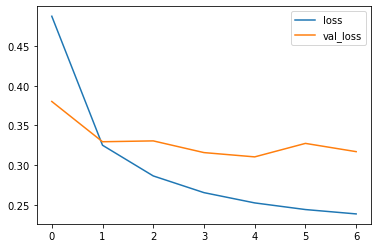

In [128]:
loss[['loss','val_loss']].plot()

In [151]:

#predictions 
def pred(x):
    
    class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag' , 'Ankle boot']
    print(plt.imshow(x_test[x],cmap='rainbow'))

    return class_names[np.argmax(model.predict(x_test[x].reshape(1,28,28,1)))]
    

AxesImage(54,36;334.8x217.44)


'Coat'

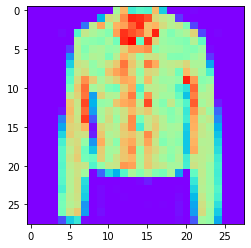

In [153]:
pred(10)